In [1]:
#调库 析晶程序判别
import os
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#初步读取和处理文本
file_path = r'C:\Users\zhang\Desktop\p3000-fix.xyz'
with open(file_path) as f:
    str_data = f.read()
data = str_data.split()

In [3]:
#定义数值
#定义最大的附近原子数
max_neigh = 6
max_dis = 2.4

In [4]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
@Time     : 2021/8/10 9:16
@Author   : Allen Pen(Haijun Peng)
@E-mail   : shengyutou@outlook.com
NOTE:
"""
import math


def fun_angle(point_a, point_b, point_c):
    """
    根据三点坐标计算夹角

                  点a
           点b ∠
                   点c

    :param point_a、point_b、point_c: 数据类型为list,二维坐标形式[x、y]或三维坐标形式[x、y、z]
    :return: 返回角点b的夹角值


    数学原理：
    设m,n是两个不为0的向量，它们的夹角为<m,n> (或用α ,β, θ ,..,字母表示)

    1、由向量公式：cos<m,n>=m.n/|m||n|

    2、若向量用坐标表示，m=(x1,y1,z1), n=(x2,y2,z2),

    则,m.n=(x1x2+y1y2+z1z2).

    |m|=√(x1^2+y1^2+z1^2), |n|=√(x2^2+y2^2+z2^2).

    将这些代入②得到：

    cos<m,n>=(x1x2+y1y2+z1z2)/[√(x1^2+y1^2+z1^2)*√(x2^2+y2^2+z2^2)]

    上述公式是以空间三维坐标给出的，令坐标中的z=0,则得平面向量的计算公式。

    两个向量夹角的取值范围是：[0,π].

    夹角为锐角时，cosθ>0；夹角为钝角时,cosθ<0.

    """
    a_x, b_x, c_x = point_a[0], point_b[0], point_c[0]  # 点a、b、c的x坐标
    a_y, b_y, c_y = point_a[1], point_b[1], point_c[1]  # 点a、b、c的y坐标

    if len(point_a) == len(point_b) == len(point_c) == 3:
        # print("坐标点为3维坐标形式")
        a_z, b_z, c_z = point_a[2], point_b[2], point_c[2]  # 点a、b、c的z坐标
    else:
        a_z, b_z, c_z = 0,0,0  # 坐标点为2维坐标形式，z 坐标默认值设为0
        # print("坐标点为2维坐标形式，z 坐标默认值设为0")

    # 向量 m=(x1,y1,z1), n=(x2,y2,z2)
    x1,y1,z1 = (a_x-b_x),(a_y-b_y),(a_z-b_z)
    x2,y2,z2 = (c_x-b_x),(c_y-b_y),(c_z-b_z)

    # 两个向量的夹角，即角点b的夹角余弦值
    cos_b = (x1*x2 + y1*y2 + z1*z2) / (math.sqrt(x1**2 + y1**2 + z1**2) *(math.sqrt(x2**2 + y2**2 + z2**2))) # 角点b的夹角余弦值
    B = math.degrees(math.acos(cos_b)) # 角点b的夹角值
    return B

In [5]:
class point:
    def __init__(self,name,x,y,z):
        #自身坐标
        self.x=x
        self.y=y
        self.z=z
        self.name=name
        self.cry=0
        #记录最近的几个点 每个点按顺序记录下xyz和dis 
        self.neighbor_atom=[]
        #记录与最近的几个点的角度 
        self.angle=[]
    
    #定义类中的替换函数  如果这个距离比原有的小，就替换掉原有点的记录
    def show(self):
        print("name: ",self.name," xyz: ",self.x," ",self.y," " ,self.z)
        print("neighbor: ")
        for i in self.neighbor_atom:
            print(i)
        print("angle: ")
        for i in self.angle:
            print(i)
            
    def sub(self,x,y,z,dis):
        
        #为空的话直接放进去
        if(len(self.neighbor_atom)==0):
            self.neighbor_atom.append([x,y,z,dis])
            return
        #大多数点是比表中最大的点距离大的 所以大的直接返回
        if(dis>5):
            return
        #如果需要调整,那么先插入表尾，再排序，再删除最后一个节点就行
        else:
            self.neighbor_atom.append([x,y,z,dis])
            self.neighbor_atom.sort(key=lambda xx:xx[-1])
            #如果表满了则删除最后一个
            if(len(self.neighbor_atom)>max_neigh):
                del self.neighbor_atom[-1]
    
    def filter_neighbor(self,max_dis):
        self.neighbor_atom.sort(key=lambda xx:xx[-1])
        for i in range(len(self.neighbor_atom)-1,-1,-1):
            if(self.neighbor_atom[-1][-1]>max_dis):
                self.neighbor_atom.pop()
    
    #计算以中心点为顶点，距离最近的任意两点为边的角的角度值
#     def cal_angle(self):
#         for i in range(len(self.neighbor_atom)):
#             for j in range(i+1,len(self.neighbor_atom)):
#                 #此时便有了point nei[i] nei[j]三个点
#                 #定义两个空间向量
#                 x1,y1,z1 = (self.neighbor_atom[i][0]-self.x),(self.neighbor_atom[i][1]-self.y),(self.neighbor_atom[i][2]-self.z)
#                 x2,y2,z2 = (self.neighbor_atom[j][0]-self.x),(self.neighbor_atom[j][1]-self.y),(self.neighbor_atom[j][2]-self.z)
#                 #两个向量的夹角
#                 cos_b = (x1*x2 + y1*y2 + z1*z2) / (math.sqrt(x1**2 + y1**2 + z1**2) *(math.sqrt(x2**2 + y2**2 + z2**2)))
#                 B = math.degrees(math.cos(cos_b)) 
#                 self.angle.append(B)
    def cal_angle(self):
        self.angle.clear()
        for i in range(len(self.neighbor_atom)):
            for j in range(i+1,len(self.neighbor_atom)):
                a = [self.neighbor_atom[i][0], self.neighbor_atom[i][1], self.neighbor_atom[i][2]]
                
                b = [self.x, self.y, self.z]
                
                c=[self.neighbor_atom[j][0], self.neighbor_atom[j][1], self.neighbor_atom[j][2]]
                
                temp = fun_angle(a,b,c)
                self.angle.append(temp)
        self.angle.sort()
    #最后还应该有一个判断是不是晶体的程序
    def judge_cry(self):
        pass

#首先 第一个是原子数 第二个数是atoms 然后开始就是四个一组的name和xyz
atoms_num = int(data[0])
frame_len = atoms_num+2
data_len =len(data)
n = data_len//frame_len

#一帧一帧地分析 暂时就分析一帧
for i in range(1):
    print("正在分析第{}帧".format(i))
    data_list = []
    #在每一帧里进行仔细分析
    for j in range(atoms_num)):
        #头两个数据不要 j[0]j[1] 没用
        #j[2]为name 需要记录下来[3] [4] [5]为xyz 统共为一行
        data_list.append([data[i*4+2]，float(data[i*4+3]),float(data[i*4+4]),float(data[i*4+5])])
        
        

In [6]:
#此处取出第一帧进行分析
atoms_num = int(data[0])
frame_len = atoms_num+2
data_len =len(data)
n = data_len//frame_len

temp=data[:2+atoms_num*4]
#暂时先自行处理了表头
temp=temp[2:]

data_list = []
for i in range(atoms_num):
    data_list.append([temp[i*4+0],float(temp[i*4+1]),float(temp[i*4+2]),float(temp[i*4+3])])

In [7]:
#此处写个程序选帧

atoms_num = int(data[0])
frame_len = atoms_num*4+2
data_len =len(data)


max_frame = data_len // frame_len
#######选帧#########
frame_num = 6

temp1 = []
temp1= data[frame_len*frame_num:frame_len*(frame_num+1)]

#暂时先自行处理了表头
temp1=temp1[2:]
frame_list = []
for i in range(atoms_num):
    frame_list.append([temp[i*4+0],float(temp[i*4+1]),float(temp[i*4+2]),float(temp[i*4+3])])

In [8]:
#定义距离函数
def cal_distance(x1,y1,z1,x2,y2,z2):
    dis = ((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)**(1/2)
    return dis

In [9]:
data_list[4555:4566]

[['Nb', 92.1819, 1.83163, 67.0505],
 ['Nb', 25.3178, 3.74272, 27.5839],
 ['Nb', 85.0992, 8.20881, 1.62945],
 ['Nb', 106.463, 5.34751, 52.741],
 ['Nb', 117.973, 4.7145, 20.7354],
 ['Nb', 101.11, 6.28752, 56.9619],
 ['Nb', 102.909, 5.99059, 38.2821],
 ['Nb', 98.2967, 3.00116, 69.6672],
 ['Nb', 100.052, 6.9161, 69.1877],
 ['Nb', 98.3646, 5.92766, 24.1193],
 ['Nb', 121.147, 7.8084, 63.1828]]

In [10]:
#记录class点的列表
o_point = []
nb_point = []
li_point = []


for i in data_list:
    if(i[0]=='Nb'):
        nb_point.append(point(i[0],i[1],i[2],i[3]))
    if(i[0]=='O'):
        o_point.append([i[1],i[2],i[3]])
    if(i[0]=='Li'):
        li_point.append([i[1],i[2],i[3]])

In [11]:
#对所有的点进行排列组合 找到距离最近的六个点的位置放入表中

for i in nb_point:
    for j in o_point:
        
        if(abs(i.x-j[0])>5 or abs(i.y-j[1])>5 or abs(i.z-j[2])>5):
            continue
        dis = cal_distance(i.x, i.y, i.z, j[0], j[1], j[2])
        #通过计算各个点的距离  如果距离小了就放入列表中
        i.sub(j[0], j[1], j[2], dis)

In [12]:
for i in nb_point[:2]:
    i.show()

name:  Nb  xyz:  47.0994   6.80739   33.8839
neighbor: 
[47.9396, 5.66805, 35.0309, 1.8219881107186195]
[45.2862, 5.96924, 34.2767, 2.0357999662294937]
[48.9647, 7.43161, 33.1666, 2.0936843096321813]
[47.1598, 5.88531, 31.9453, 2.147568310066059]
[45.8133, 8.03697, 32.5827, 2.204323394241416]
[46.9064, 8.85206, 35.055, 2.364191113023651]
angle: 
name:  Nb  xyz:  10.567   6.48451   33.0977
neighbor: 
[11.1066, 8.40905, 33.1621, 1.9997924221278571]
[9.48607, 5.21936, 31.9179, 2.039838774854525]
[10.8849, 6.23675, 35.1517, 2.093170186009723]
[12.3871, 5.18591, 32.8255, 2.252380698283486]
[8.38054, 6.32243, 34.3099, 2.5052556951337306]
[10.3542, 7.59207, 30.8526, 2.5124583585803006]
angle: 


In [12]:
#再计算各自的角度
for i in nb_point:
    i.cal_angle()

In [14]:
for i in nb_point[:2]:
    i.show()

name:  Nb  xyz:  47.0994   6.80739   33.8839
neighbor: 
[47.9396, 5.66805, 35.0309, 1.8219881107186195]
[45.2862, 5.96924, 34.2767, 2.0357999662294937]
[48.9647, 7.43161, 33.1666, 2.0936843096321813]
[47.1598, 5.88531, 31.9453, 2.147568310066059]
[45.8133, 8.03697, 32.5827, 2.204323394241416]
[46.9064, 8.85206, 35.055, 2.364191113023651]
angle: 
73.92185266081923
76.25247729835785
78.09376152729223
79.8571523722414
89.11688100012788
89.50008546349844
91.28647920736643
91.82259974053952
98.69988273529528
100.82320186207619
105.46334716474895
106.66738820577979
145.16267339175485
169.22027729700866
171.67861605245204
name:  Nb  xyz:  10.567   6.48451   33.0977
neighbor: 
[11.1066, 8.40905, 33.1621, 1.9997924221278571]
[9.48607, 5.21936, 31.9179, 2.039838774854525]
[10.8849, 6.23675, 35.1517, 2.093170186009723]
[12.3871, 5.18591, 32.8255, 2.252380698283486]
[8.38054, 6.32243, 34.3099, 2.5052556951337306]
[10.3542, 7.59207, 30.8526, 2.5124583585803006]
angle: 
68.1234214091616
69.517749000

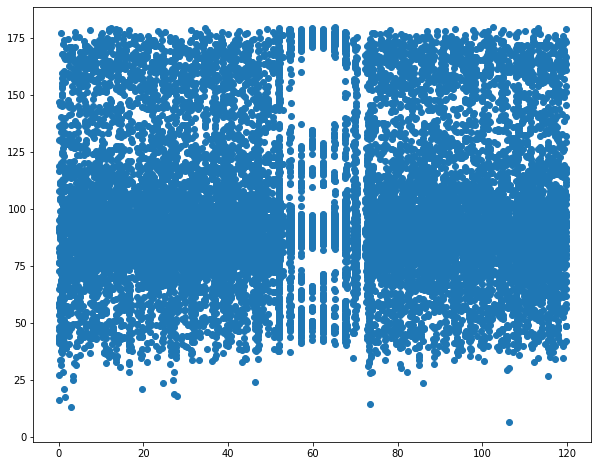

In [13]:
#现在有了各个点的数据和角度，那么怎么判断是不是晶体呢？
#可以画图来看看~ 分别画出总体的角度分布 以及晶体区域的角度分布
#画一下晶体区域的角度

#调整neighbor_dis 
max_dis=5

# for i in nb_point:
#     i.filter_neighbor(2.4)

list_cry= []
for i in nb_point:
    if(i.x>0 and i.x<120):
        list_cry.append(i)

y=[]
x=[]
for i in list_cry:
    for j in i.angle:
        y.append(j)
        x.append(i.x)

plt.figure(figsize=(10,8))
plt.scatter(x,y)

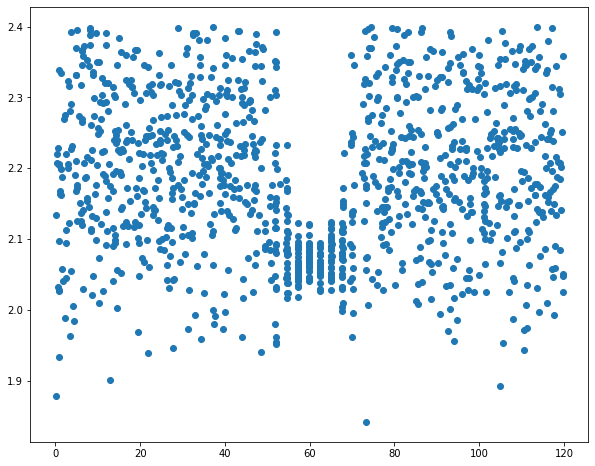

In [36]:
x1,y1=[],[]
for i in list_cry:
    t = 0.0
    for j in i.neighbor_atom:
        if(j[-1]>t):
            t =j[-1]
    y1.append(t)
    x1.append(i.x)
plt.figure(figsize=(10,8))
plt.scatter(x1,y1)

In [21]:
for i in list_cry:
    if(len(i.angle)==0):
        i.show()
        print("no")

In [26]:
#先是过滤掉不靠谱数据 再计算角度
list_test = list_cry
for i in list_test:
    i.filter_neighbor(2.5)
    i.cal_angle()

#判断晶体区域函数
def is_cry(list_angel,amin,amax,bmin,bmax):
    #通过再区间里的角的数量的占比来判断是不是cry
    cry=0
    sum0=0
    for i in list_angel:
        sum0 += 1
        if((amin<i<amax) or (bmin<i<bmax)):
            cry += 1
    #如果符合要求的原子数量大于80%则认为这个原子是cry
    if(cry/sum0>0.50):
        return 1
    else:
        return 0
    
##但是这种方法不能判断“孪晶”的生成，孪晶应该有它自己的判断方式 
##就是和周围的原子的排列很有规则 而他的角度并不是一个特定的值能够限定的

In [14]:
print(len(list_cry[0].angle))
is_cry_list = []
for i in list_cry:
    if(is_cry(i.angle,80,100,170,180)):
        is_cry_list.append(i)
print(len(is_cry_list))
print(len(is_cry_list)/len(list_cry))

15


NameError: name 'is_cry' is not defined

In [19]:
173/229

0.7554585152838428

In [ ]:
nb_point[1].show()

In [ ]:
for i in nb_point:
    if(i.x>60 and i.x<65):
        i.show()
        break

In [ ]:
for i in nb_point:
    if(i.x>54 and i.x<60):
        i.show()
        break

In [ ]:
for i in nb_point:
    if(i.x<40 and i.x>10):
        i.show()
        break

In [ ]:
nb_point[0].show()

In [ ]:
nb_point[0].filter_neighbor(2.3)

In [ ]:
nb_point[0].show()